# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.265154e+01     1.516366e+01
 * time: 0.004127979278564453
     1     6.197238e+01     1.027541e+01
 * time: 0.012444019317626953
     2     5.634075e+01     1.301674e+01
 * time: 0.03122401237487793
     3     4.173509e+01     1.012202e+01
 * time: 0.057153940200805664
     4     3.466435e+01     9.934563e+00
 * time: 0.08318185806274414
     5     1.404461e+01     3.109302e+00
 * time: 0.2072598934173584
     6     1.150703e+01     4.199113e+00
 * time: 0.22718000411987305
     7     9.049458e+00     2.824608e+00
 * time: 0.24645400047302246
     8     8.182044e+00     4.059058e+00
 * time: 0.2618448734283447
     9     7.550056e+00     3.588472e+00
 * time: 0.2770838737487793
    10     7.341480e+00     3.863932e+00
 * time: 0.2925870418548584
    11     6.660117e+00     2.463709e+00
 * time: 0.307966947555542
    12     6.155503e+00     1.373671e+00
 * time: 0.33184289932250977
    13     5.849620e+00     1.043463e+00
 * time: 0.

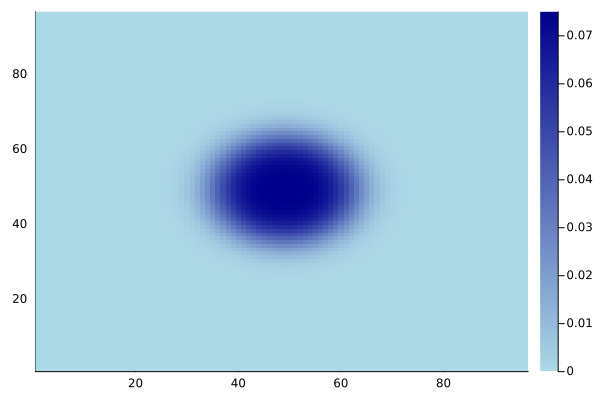

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)